# CS 7641 Machine Learning - Assignment 2

student: Xinru Lu - xlu320 - xlu320@gatech.edu

The repository is accessible at: https://github.com/Lorraine97/ML_2022/tree/main/project_2

## Import Libraries

In [112]:
import six
import mlrose
import time
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score

## 4 Algorithms for 3 Problems


**Four Algorithms:**
- randomized hill climbing
- simulated annealing
- a genetic algorithm
- MIMIC

**Three Problems (from 3 package classes):**

1. Discrete problem of 4 Peaks: Maximize the fitness of an n-dimensional state vector x, given parameter T, as:
$$Fitness(x, T) = \max(tail(0, x), head(1, x)) + R(x, T)$$ where: $tail(b, x)$ is the number of trailing b’s in x, 
$head(b, x)$ is the number of leading b’s in x, 
$R(x, T) = n$, if $tail(0, x) > T$ and $head(1, x) > T$; 
and $R(x, T) = 0$, otherwise.

2. Maximizing one value problem: Maximize the fitness of an n-dimensional state vector $x = [x_{0}, x_{1}, \ldots, x_{n-1}]$ as:

$$Fitness(x) = \sum_{i = 0}^{n-1}x_{i}$$

3. Travelling Salesman optimization problem: Maximize fitness of a tour of n nodes, represented by state vector x, giving the order in which the nodes are visited, as the total distance travelled on the tour (including the distance travelled between the final node in the state vector and the first node in the state vector during the return leg of the tour). Each node must be visited exactly once for a tour to be considered valid.

In [ ]:
results = []

# test 4 algo
def test_algos(results, problem, problem_size, problem_type):
    for max_iters in range(50, 2000, 200):
            test_start = time.time()
            fitness_score = mlrose.random_hill_climb(problem, max_attempts=100, max_iters=max_iters, restarts=10, random_state=3)
            test_time = time.time() - test_start
            results.append([max_iters, problem_size, "random_hill_climb", problem_type, fitness_score[1], test_time])

            test_start = time.time()
            fitness_score = mlrose.simulated_annealing(problem, max_attempts=100, max_iters=max_iters, random_state=3)
            test_time = time.time() - test_start
            results.append([max_iters, problem_size, "simulated_annealing", problem_type, fitness_score[1], test_time])

            test_start = time.time()
            fitness_score = mlrose.genetic_alg(problem, max_attempts=100, max_iters=max_iters, pop_size=200, mutation_prob=0.1, random_state=3)
            test_time = time.time() - test_start
            results.append([max_iters, problem_size, "genetic_alg", problem_type, fitness_score[1], test_time])

            if not problem_type == "OneMax":
                test_start = time.time()
                fitness_score = mlrose.mimic(problem, pop_size=100, keep_pct=0.2, max_attempts=10, max_iters=max_iters, random_state=70, curve=True)
                test_time = time.time() - test_start
                results.append([max_iters, problem_size, "mimic", problem_type, fitness_score[1], test_time])


for problem_size in [15, 30, 50]:
    problem = mlrose.DiscreteOpt(length=problem_size, fitness_fn=mlrose.FourPeaks(), maximize=True, max_val=2)
    problem_type = "FourPeaks"
    test_algos(results, problem, problem_size, problem_type)

    problem = mlrose.ContinuousOpt(length=100, fitness_fn=mlrose.OneMax(), maximize=True, max_val=2)
    problem_type = "OneMax"
    test_algos(results, problem, problem_size, problem_type)

    coords_list = []
    for _ in range(size):
        coords_list.append((random.randint(0, 100), random.randint(0, 100)))
    fitness_coords = mlrose.TravellingSales(coords = coords_list)
    problem = mlrose.TSPOpt(length=size, fitness_fn=fitness_coords, maximize=False)
    problem_type = "TravellingSales"
    test_algos(results, problem, problem_size, problem_type)

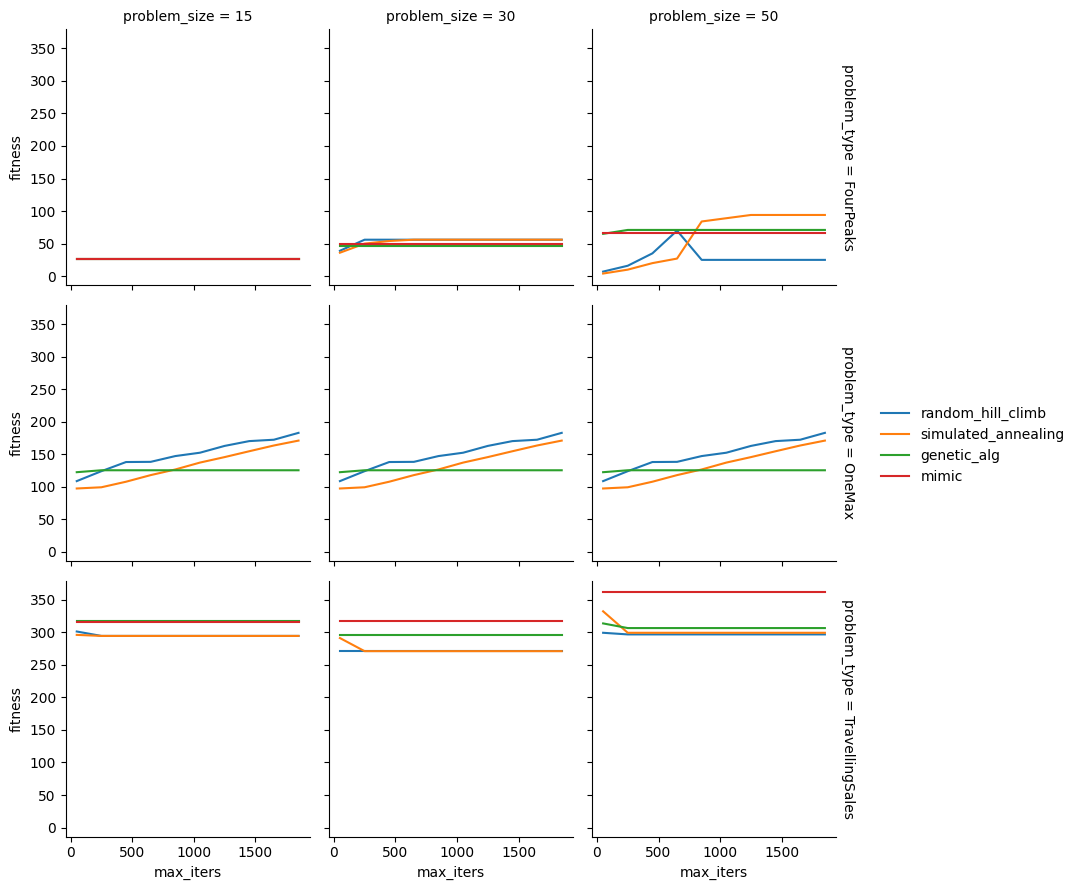

In [100]:
result_df = pd.DataFrame(results, columns=["max_iters", "problem_size", "algorithm", "problem_type", "fitness", "processing_time"])
result_df.to_csv('4_algo_results.csv')
sea = sns.FacetGrid(result_df, row = "problem_type", col = "problem_size", margin_titles = True)
sea.map_dataframe(sns.lineplot, x="max_iters", y="fitness", hue="algorithm")
sea.add_legend()
plt.savefig('fitness.png')

### Analysis:

From the above plot, we observe that at a relatively small sample size, the maximum number of iterations does not impace the fitness scores for FourPeaks and TravellingSales problems, but impacted the OneMax continuous problem. This make a lot of sense since the continuous problem will form an infinite number of possible outcomes even with very limited data, therefore the maximum value is allowed grow as the iterations grow. At problem size 50, where there is a significant correlation between the number of iterations and the fitness function value, we observe that simulated_annealing performs the best for FourPeaks problem while the random_hill_climb performs the best for OneMax problem. For TravellingSales problem, MIMIC algorithm almost always outperforms the others. 

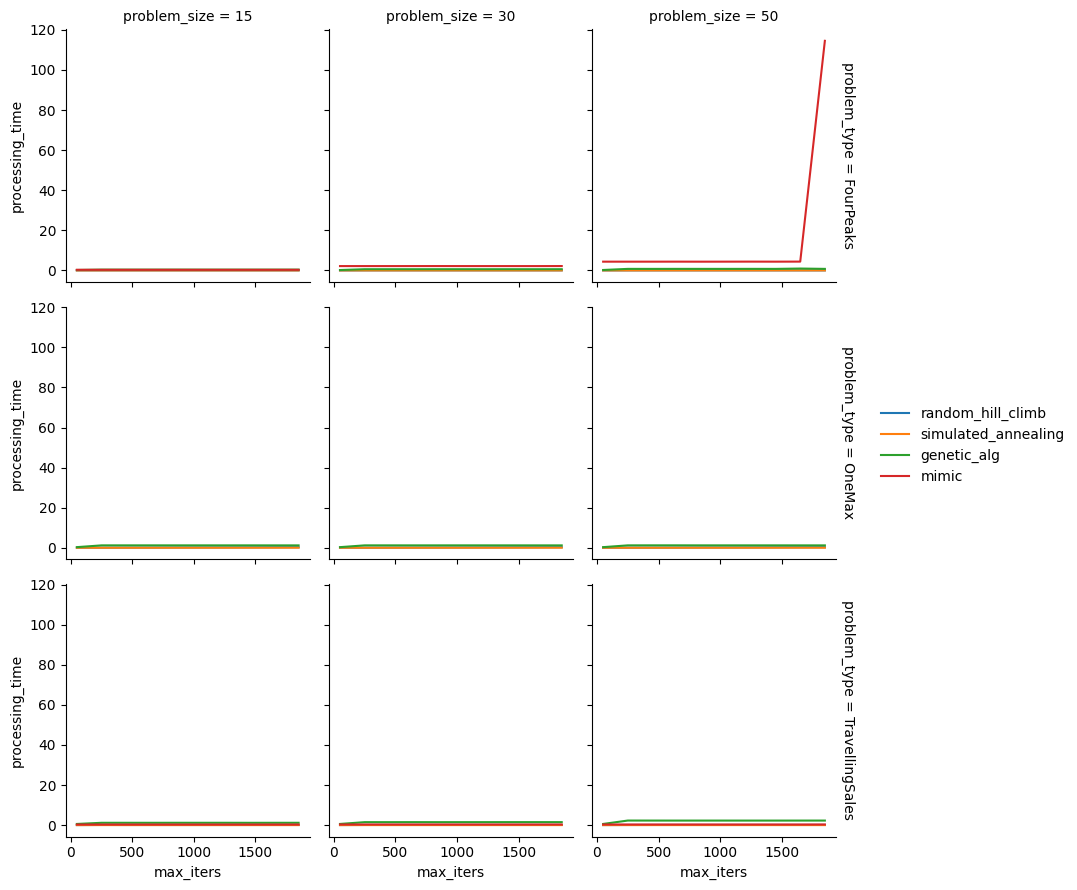

In [99]:
sea = sns.FacetGrid(result_df, row = "problem_type", col = "problem_size", margin_titles = True)
sea.map_dataframe(sns.lineplot, x="max_iters", y="processing_time", hue="algorithm")
sea.add_legend()
plt.savefig('processing_time_iters.png')

### Analysis:

From the above plot, we observe that the processing time for all algorithms for problem FourPeaks and OneMax seem to remain constant along an increasing number of iterations. However, for MIMIC in problem TravellingSales, it seems to grow exponentially after 1500 iterations. I think this is related to the size of RAM, as the data points go higher and higher, it might reach the limit of the hardware, especially when MIMIC stores much more information than the other algorithms at a time, and therefore leads to a jump in time consumption. 

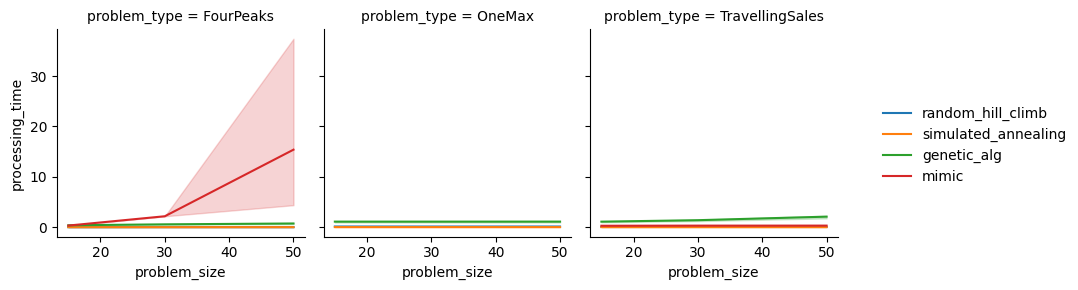

In [101]:
sea = sns.FacetGrid(result_df, col = "problem_type", margin_titles = True)
sea.map_dataframe(sns.lineplot, x="problem_size", y="processing_time", hue="algorithm")
sea.add_legend()
plt.savefig('processing_time_size.png')

### Analysis:

From the above plot, we observe that the processing time for problem OneMax and TravellingSales is almost constant along a growing problem_size, while for FourPeaks, the processing time for MIMIC in specific seems to grow exponentially. This makes sense since MIMIC explores the structure of the data, while others only keep a certain number of data points at a time.  

## Fitting a Neural Network to the Loan Dataset

### Dataset from Assignment 1

To keep it consistent, I re-used the "loan eligibility" dataset from [assignment 1](../project_1/assignment_1.ipynb). For more information, there is a designated section to describe the dataset in part 3. 

In [102]:
# load loan eligibility dataset
loan_data = pd.read_csv('../project_1/data/loan_eligibility.csv')

# Split data into training and test sets
loan_attr_data = loan_data.loc[:, loan_data.columns != 'Loan_Status']
loan_status_data = loan_data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(loan_attr_data, loan_status_data, random_state = 3)

In [103]:
# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.values.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.values.reshape(-1, 1)).todense()

In [105]:
def fit_and_score(X_train, y_train, X_test, y_test, algorithm='random_hill_climb', max_iters=1000):
    # Initialize neural network object and fit object
    nn_model = mlrose.NeuralNetwork(hidden_nodes=[2], activation='relu',
                                    algorithm=algorithm, 
                                    max_iters=max_iters, bias=True, is_classifier=True, 
                                    learning_rate=0.01, early_stopping=True, 
                                    clip_max=5, max_attempts=100, random_state=3, mutation_prob = 0.1)
    fit_start = time.time()
    nn_model.fit(X_train, y_train)
    fit_time = time.time() - fit_start
    test_start = time.time()
    y_train_pred = nn_model.predict(X_train)
    test_time = time.time() - test_start
    y_train_accuracy = accuracy_score(y_train, y_train_pred)
    y_test_pred = nn_model.predict(X_test)
    y_test_accuracy = accuracy_score(y_test, y_test_pred)
    
    return [max_iters, algorithm, y_train_accuracy, y_test_accuracy, f1_score(y_test, y_test_pred, average='micro'), fit_time, test_time]

In [106]:
algorithms = ['random_hill_climb', 'simulated_annealing', 'genetic_alg']

result_data = []
for algorithm in algorithms:
    for max_iters in range(1, 1000, 100):
        result_data.append(fit_and_score(X_train_scaled, y_train_hot, X_test_scaled, y_test_hot, algorithm, max_iters))

In [107]:
nn_df = pd.DataFrame(result_data, columns=["max_iters", "algorithm", "y_train_accuracy", "y_test_accuracy",
                                           "f1_score", "fit_time", "test_time"])
nn_df.to_csv('nn_results.csv')

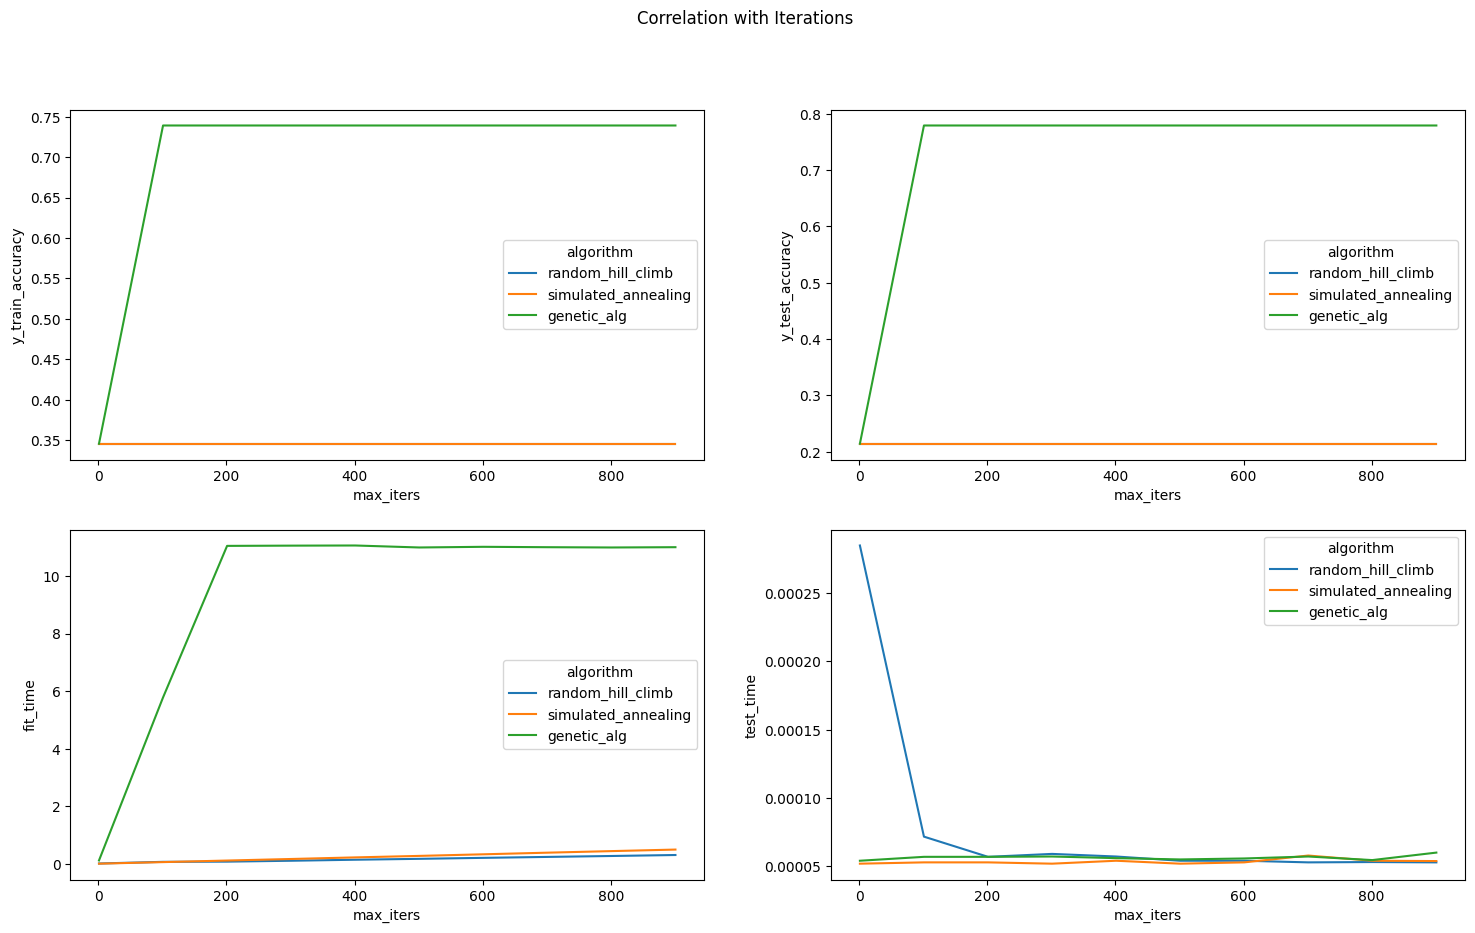

In [116]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Correlation with Iterations')

sns.lineplot(ax=axes[1, 0], data=nn_df, x="max_iters", y="fit_time", hue="algorithm")
sns.lineplot(ax=axes[1, 1], data=nn_df, x="max_iters", y="test_time", hue="algorithm")
sns.lineplot(ax=axes[0, 0], data=nn_df, x="max_iters", y="y_train_accuracy", hue="algorithm")
sns.lineplot(ax=axes[0, 1], data=nn_df, x="max_iters", y="y_test_accuracy", hue="algorithm")
plt.savefig('nn.png')

### Analysis:

We observe from the above plot that the score for `genetic_alg` seems to increase and then converge to around 0.78, while the score for the other two remains around 0.2 regardless of the number of iterations. At the same time, the training cost for `genetic_alg` also increases as the number of iterations increase from 0 to 200, and then converges to a constant time; the training cost for the other two seem to remain constant as the maximum number of iterations increases. For testing time, random_hill_climb seems to consume a lot time when the iteration is limited, but eventually converges to somewhat constant, just as other algorithms. 

<AxesSubplot: xlabel='max_iters', ylabel='f1_score'>

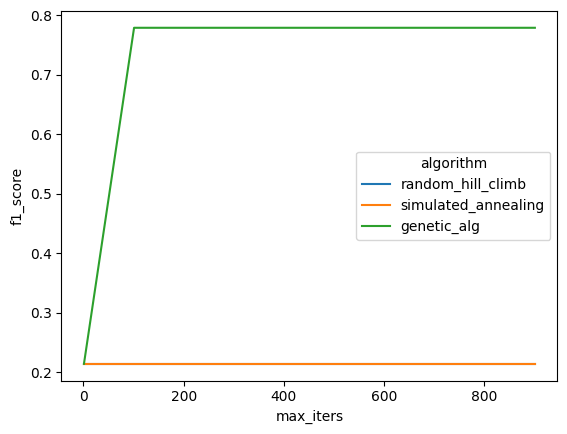

In [115]:
sns.lineplot(data=nn_df, x="max_iters", y="f1_score", hue="algorithm")

### Analysis:

F1-score is a metric for performance, similar to accuracy scores. It is the harmonic mean between precision and recall. The `f1_score` for `random_hill_climb` and `simulated_annealing` are overlapped in the graph. The score for `genetic_alg` seems to increase and then converge to around 0.78, while the score for the other two remains around 0.2 regardless of the number of iterations. The `f1_score` here matches what we saw earlier on the accuracy plots, suggesting that despite that it consumes significantly more time than the other two, `genetic_alg` might be the best algorithm for optimizing the neural networks model for the "load eligibility" dataset. 